# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Add format specifier to request url
#btc_url = btc_url + "?format=json"
#eth_url = eth_url + "?format=json"

In [5]:
# Execute get request
requests.get(btc_url)
requests.get(eth_url)

<Response [200]>

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc_data = requests.get(btc_url)
response_btc_content = response_btc_data.content
print(response_btc_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 19016993,\n\t\t\t"total_supply": 19016993,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 41183.0000000000000000,\n\t\t\t\t\t"volume_24h": 23556157639,\n\t\t\t\t\t"market_cap": 785662733975,\n\t\t\t\t\t"percentage_change_1h": -0.2920335111647870,\n\t\t\t\t\t"percentage_change_24h": -0.8424651457228010,\n\t\t\t\t\t"percentage_change_7d": 2.4304495213385800,\n\t\t\t\t\t"percent_change_1h": -0.2920335111647870,\n\t\t\t\t\t"percent_change_24h": -0.8424651457228010,\n\t\t\t\t\t"percent_change_7d": 2.4304495213385800\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 51379.9108,\n\t\t\t\t\t"volume_24h": 29388662270.4164,\n\t\t\t\t\t"market_cap": 980192826907.21,\n\t\t\t\t\t"percent_change_1h": -0.2920335111647870,\n\t\t\t\t\t"percent_change_24h": -0.8424651457228010,\n\t\t\t\t\t"

In [7]:
data_btc = response_btc_data.json()
print(json.dumps(data_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19016993,
            "total_supply": 19016993,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 41183.0,
                    "volume_24h": 23556157639,
                    "market_cap": 785662733975,
                    "percentage_change_1h": -0.292033511164787,
                    "percentage_change_24h": -0.842465145722801,
                    "percentage_change_7d": 2.43044952133858,
                    "percent_change_1h": -0.292033511164787,
                    "percent_change_24h": -0.842465145722801,
                    "percent_change_7d": 2.43044952133858
                },
                "CAD": {
                    "price": 51379.9108,
                    "volume_24h": 29388662270.4164,
                 

In [8]:
# Fetch current ETH price
# YOUR CODE HERE!
response_eth_data = requests.get(eth_url)
response_eth_content = response_eth_data.content
print(response_eth_content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 120457243,\n\t\t\t"total_supply": 120457243,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 3062.6900000000000000,\n\t\t\t\t\t"volume_24h": 14576188856,\n\t\t\t\t\t"market_cap": 370149366208,\n\t\t\t\t\t"percentage_change_1h": -0.5407708118147530,\n\t\t\t\t\t"percentage_change_24h": -1.8999709875711800,\n\t\t\t\t\t"percentage_change_7d": 0.8056025089910040,\n\t\t\t\t\t"percent_change_1h": -0.5407708118147530,\n\t\t\t\t\t"percent_change_24h": -1.8999709875711800,\n\t\t\t\t\t"percent_change_7d": 0.8056025089910040\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 3821.012044,\n\t\t\t\t\t"volume_24h": 18185253216.7456,\n\t\t\t\t\t"market_cap": 461798349281.101,\n\t\t\t\t\t"percent_change_1h": -0.5407708118147530,\n\t\t\t\t\t"percent_change_24h": -1.8999709875711800,\n\t\t\t\

In [9]:
data_eth = response_eth_data.json()
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120457243,
            "total_supply": 120457243,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3062.69,
                    "volume_24h": 14576188856,
                    "market_cap": 370149366208,
                    "percentage_change_1h": -0.540770811814753,
                    "percentage_change_24h": -1.89997098757118,
                    "percentage_change_7d": 0.805602508991004,
                    "percent_change_1h": -0.540770811814753,
                    "percent_change_24h": -1.89997098757118,
                    "percent_change_7d": 0.805602508991004
                },
                "CAD": {
                    "price": 3821.012044,
                    "volume_24h": 18185253216.7456,
             

In [10]:
# Compute current value of my crpto
#print(data_btc)
# YOUR CODE HERE!
current_btc_price = data_btc['data']['1']['quotes']['CAD']['price']
current_eth_price = data_eth['data']['1027']['quotes']['CAD']['price']

my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61655.89
The current value of your 5.3 ETH is $20251.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [13]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-04-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

start = pd.Timestamp("2022-04-13", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-04-14", tz="America/New_York").isoformat()

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
investment_data_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
investment_data_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-14 04:00:00+00:00,104.73,104.7400,103.93,103.97,8505987,30443,104.171733,AGG
2022-04-14 04:00:00+00:00,443.44,444.7301,437.68,437.79,98667135,703727,440.305786,SPY


In [15]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = investment_data_df[investment_data_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = investment_data_df[investment_data_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
investment_data_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!
investment_data_df

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-04-14 04:00:00+00:00  104.73  104.74  103.93  103.97  8505987   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2022-04-14 04:00:00+00:00       30443  104.171733  443.44  444.7301  437.68   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-14 04:00:00+00:00  437.79  98667135      703727  440.305786

In [16]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(investment_data_df["AGG"]["close"])
spy_close_price = float(investment_data_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.97
Current SPY closing price: $437.79


In [17]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

In [18]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21889.50
The current value of your 200 AGG shares is $20794.00


### Savings Health Analysis

In [19]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
current_crypto = round((my_btc_value + my_eth_value),2)
current_shares = my_spy_value + my_agg_value

#value_data = {'AMount':["AGG", my_agg_value, "SPY", my_spy_value]}
#value_data = [{'AGG': my_agg_value, 'SPY': my_spy_value}]
value_data = pd.DataFrame({
    "Amount": (current_crypto, current_shares)
},index=["Crypto","Shares"])

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(value_data)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,81907.26
Shares,42683.50


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

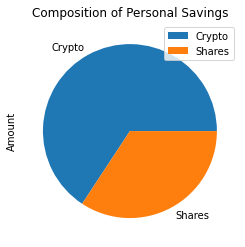

In [20]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = monthly_income + current_crypto + current_shares

# Validate saving health
# YOUR CODE HERE!

if total_savings < emergency_fund:
    print(f"You do not have enough money in your emergency fund. You need to save ${emergency_fund - total_savings}")
elif total_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set timeframe to "1Day"
#timeframe = "1Day"

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-15', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG","SPY"]

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
df_ticker

# Separate ticker data
# YOUR CODE HERE!

AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-17 04:00:00+00:00  109.30  109.4000  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.7000  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.5600  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.4000  109.20  109.31  1867805   
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.34  1539265   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2017-04-17 04:00:00+00:00        7973  109.294030  233.12  234.570  232.88   
2017-04-18 04:00:00+00:00       14488  109.579396  233.71  234.490  233.08   
2017-04-19 04:00:00+00:00        9587  109.455386  234.52  234.950  233.18   
2017-04-20 04:00:00+00:00        7319  109.301387  234.14  235.845  233.78   
2017-04-21 04:00:00+00:00        8708  109.386803  235.22  235.310  234.13   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-04-17 04:00:00+00:00  234.57   68405367      213643  233.870859  
2017-04-18 04:00:00+00:00  233.87   83225836      245279  233.958942  
2017-04-19 04:00:00+00:00  233.44   68699868      248643  233.953779  
2017-04-20 04:00:00+00:00  235.34   92572186      279885  234.978432  
2017-04-21 04:00:00+00:00  234.59  110389847      258915  234.784238

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [25]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-17 04:00:00+00:00  109.30  109.4000  109.18  109.21  1646056   
2017-04-18 04:00:00+00:00  109.41  109.7000  109.39  109.65  2369862   
2017-04-19 04:00:00+00:00  109.47  109.5600  109.39  109.48  2148531   
2017-04-20 04:00:00+00:00  109.31  109.4000  109.20  109.31  1867805   
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.34  1539265   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-17 04:00:00+00:00        7973  109.294030          NaN  233.12   
2017-04-18 04:00:00+00:00       14488  109.579396     0.004029  233.71   
2017-04-19 04:00:00+00:00        9587  109.455386    -0.001550  234.52   
2017-04-20 04:00:00+00:00        7319  109.301387    -0.001553  234.14   
2017-04-21 04:00:00+00:00        8708  109.386803     0.000274  235.22   

                                                                           \
                              high     low   close     volume trade_count   
timestamp                                                                   
2017-04-17 04:00:00+00:00  234.570  232.88  234.57   68405367      213643   
2017-04-18 04:00:00+00:00  234.490  233.08  233.87   83225836      245279   
2017-04-19 04:00:00+00:00  234.950  233.18  233.44   68699868      248643   
2017-04-20 04:00:00+00:00  235.845  233.78  235.34   92572186      279885   
2017-04-21 04:00:00+00:00  235.310  234.13  234.59  110389847      258915   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-17 04:00:00+00:00  233.870859          NaN  
2017-04-18 04:00:00+00:00  233.958942    -0.002984  
2017-04-19 04:00:00+00:00  233.953779    -0.001839  
2017-04-20 04:00:00+00:00  234.978432     0.008139  
2017-04-21 04:00:00+00:00  234.784238    -0.003187

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Andrewi\Desktop\Fintech\Practice\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996626,1.012239,1.002798,1.006899,1.014901,1.003424,1.006289,1.010550,1.007023,0.999510,...,1.006499,1.000792,0.993930,1.004283,1.006030,0.996429,1.002991,0.987110,0.999561,0.990666
2,0.996808,1.013972,1.003632,1.022663,1.010716,1.004467,1.008835,1.014566,1.013949,0.994362,...,1.011759,0.999096,0.986662,0.999305,1.000636,0.996538,1.005572,0.990829,1.000615,0.994541
3,0.987868,1.016124,0.998098,1.016491,1.010134,1.002084,1.010194,1.006358,1.008337,0.990612,...,1.013641,1.011313,0.991563,1.001570,1.006040,1.002164,1.004740,0.987004,0.995810,0.993479
4,0.981239,1.009905,0.992061,1.026080,1.015259,1.007034,1.011757,1.012211,1.014874,0.992455,...,0.999275,1.012050,0.990570,0.999022,0.993153,0.993792,0.998132,0.994334,0.995169,0.985156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.953600,6.560500,3.833930,13.665697,15.363764,7.167793,8.778885,11.301600,8.534739,5.722365,...,10.150865,7.825103,8.154225,13.201137,7.932561,5.715843,5.026084,5.510436,13.818733,16.016368
7557,3.978291,6.575137,3.794741,13.635898,15.467868,7.200271,8.786881,11.231286,8.539549,5.781664,...,9.967167,7.771928,8.181564,13.323051,7.807700,5.750327,5.075717,5.401751,13.673014,16.135940
7558,3.990391,6.576844,3.776950,13.654430,15.425727,7.166892,8.667014,11.332661,8.606831,5.738754,...,9.876758,7.805381,8.198950,13.383418,7.785118,5.731153,5.089967,5.412012,13.524074,16.317382
7559,4.012270,6.533961,3.807728,13.769885,15.551060,7.158636,8.759426,11.283574,8.566651,5.718503,...,9.909673,7.861484,8.148346,13.401114,7.779613,5.715577,5.021642,5.428613,13.404372,16.425804


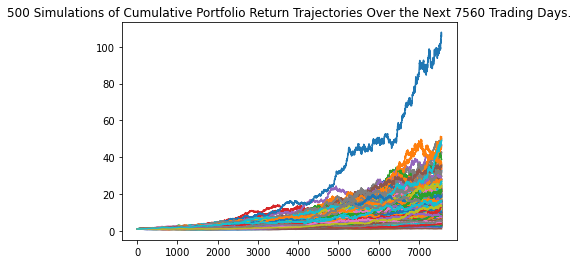

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

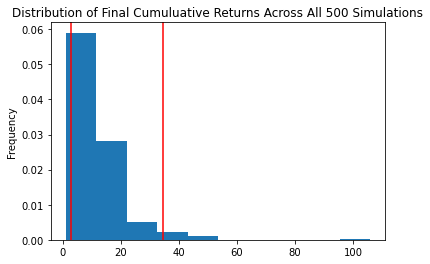

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
#even_tbl = MC_even_dist.summarize_cumulative_return()
simulated_returns_data = {
    "mean": list(MC_even_dist.simulated_return.mean(axis=1)),
    "median": list(MC_even_dist.simulated_return.median(axis=1)),
    "min": list(MC_even_dist.simulated_return.min(axis=1)),
    "max": list(MC_even_dist.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count           500.000000
mean             11.744600
std               8.930351
min               1.098117
25%               6.189180
50%               9.576882
75%              14.106671
max             105.791555
95% CI Lower      2.925326
95% CI Upper     34.656275
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $58506.52 and $693125.51


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $87759.78 and $1039688.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist5 = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Andrewi\Desktop\Fintech\Practice\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998077,0.997777,1.006562,0.985118,0.974600,1.000160,0.986641,1.000535,1.003439,0.981495,...,0.995826,1.019817,0.996154,0.998171,1.001532,0.983588,0.981586,1.002601,0.996149,0.986414
2,1.007588,0.996941,1.003728,1.002177,0.953957,1.004368,0.996693,1.004880,0.995445,0.973343,...,0.999064,1.026716,1.007791,1.008550,1.009985,0.978970,0.987507,1.022920,1.001512,0.996847
3,1.011743,1.017116,0.995315,1.008493,0.967034,1.026695,0.993780,0.999074,0.989806,0.972858,...,1.013293,1.015102,1.002778,0.992083,1.011703,0.974621,0.986292,1.026218,1.001861,1.013507
4,0.999806,1.028393,0.985314,1.002750,0.970357,1.031154,0.974225,1.003511,0.988846,0.949038,...,1.018443,1.001266,1.021903,0.977802,1.018295,0.980947,0.990485,1.017245,0.994669,1.033098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.171453,2.105280,0.862256,1.521981,2.200254,3.780429,1.237278,1.680357,1.795521,1.288225,...,1.293425,3.221568,1.361849,1.161869,1.332551,3.077470,2.303736,1.405849,1.384627,3.116202
1257,2.194011,2.095658,0.868778,1.504686,2.228132,3.710789,1.252757,1.686086,1.789251,1.285829,...,1.284373,3.218385,1.359296,1.174066,1.296260,3.038482,2.315658,1.391628,1.384801,3.155101
1258,2.185862,2.088022,0.871725,1.513076,2.225371,3.724225,1.266689,1.700952,1.775915,1.276298,...,1.301002,3.223415,1.332964,1.161910,1.301648,3.056052,2.317447,1.407937,1.372112,3.202838
1259,2.191183,2.086243,0.878221,1.509757,2.198125,3.765198,1.284872,1.728022,1.758805,1.280662,...,1.293645,3.224145,1.340968,1.165937,1.325089,3.050914,2.373008,1.394694,1.379981,3.156568


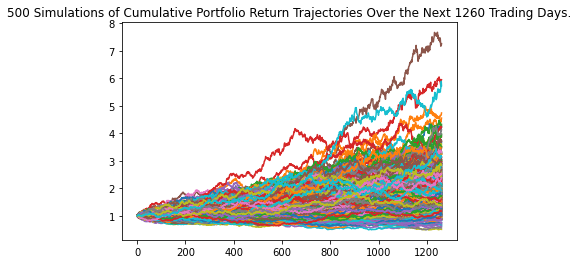

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
att_line_plot = MC_even_dist5.plot_simulation()

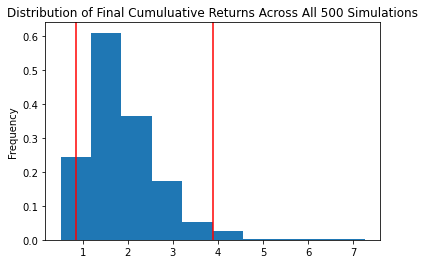

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
att_dist_plot = MC_even_dist5.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
att_tbl = MC_even_dist5.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(att_tbl)

count           500.000000
mean              1.893480
std               0.812178
min               0.506373
25%               1.334178
50%               1.729374
75%               2.321262
max               7.257710
95% CI Lower      0.857832
95% CI Upper      3.897875
Name: 1260, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(att_tbl[8]*initial_investment,2)
ci_upper_five = round(att_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51469.92 and $233872.49


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist10 = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Andrewi\Desktop\Fintech\Practice\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006207,0.988610,0.982927,1.013901,0.992759,0.992679,1.014035,0.982564,0.982611,1.030614,...,1.001385,0.990601,0.991139,1.019007,0.985474,0.992044,0.991515,1.003556,0.983587,0.992993
2,1.016678,1.000880,1.004739,1.020953,0.992487,0.997996,1.006292,0.971907,0.972790,1.040986,...,0.990375,0.991602,0.974622,1.028084,0.995380,0.995211,0.998120,1.002400,0.965417,0.995758
3,1.013622,0.996740,1.000828,1.031968,1.008821,0.996498,1.007252,0.973484,0.971100,1.043505,...,0.976355,1.001809,0.979638,1.036992,1.008113,1.017490,1.007481,1.012850,0.956748,0.990758
4,1.009171,0.996788,1.021258,1.031606,1.024880,1.016640,1.013098,0.976570,0.986540,1.064360,...,0.967058,0.986663,0.975994,1.056160,0.994701,1.015154,1.012402,1.008786,0.959065,0.992059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.725220,1.617254,10.371186,2.197399,5.673172,0.518110,9.584671,6.342034,6.901296,2.330654,...,5.772264,0.657987,4.452462,4.547001,3.170922,3.598115,13.283198,2.663636,2.680358,2.856022
2517,2.782990,1.594941,10.445940,2.160066,5.657864,0.517422,9.568546,6.317762,6.890882,2.326207,...,5.716105,0.670367,4.492222,4.610085,3.216126,3.614085,13.343289,2.708419,2.670575,2.863490
2518,2.772755,1.577171,10.336441,2.157589,5.755576,0.524607,9.429090,6.235659,6.965665,2.320387,...,5.658025,0.668049,4.438016,4.572377,3.258719,3.600925,13.542603,2.676736,2.641609,2.841997
2519,2.777246,1.569834,10.400078,2.150631,5.668373,0.527457,9.388535,6.188218,7.031036,2.306149,...,5.631060,0.665727,4.360394,4.628853,3.269707,3.620478,13.569961,2.673374,2.644779,2.847580


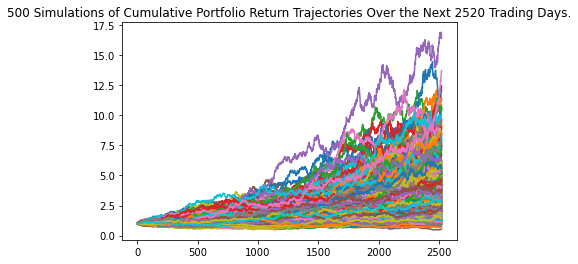

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
att_line_plot = MC_even_dist10.plot_simulation()

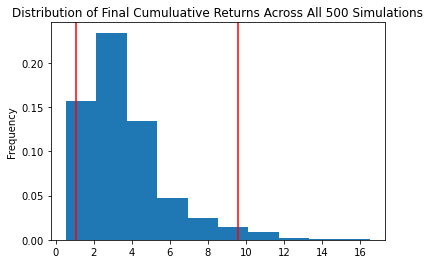

In [41]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
att_dist_plot = MC_even_dist10.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
t_tbt10 = MC_even_dist10.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(t_tbt10)

count           500.000000
mean              3.637486
std               2.243803
min               0.535754
25%               2.134290
50%               3.040927
75%               4.562500
max              16.524178
95% CI Lower      1.071697
95% CI Upper      9.559651
Name: 2520, dtype: float64


In [43]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(t_tbt10[8]*initial_investment,2)
ci_upper_ten = round(t_tbt10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64301.83 and $573579.04
